## Notebook for Running the Final Model
Since we don't expect to have answers here, we can't do much except display a few images for each class that we predict, and some metrics.

-----

In [22]:
directory_to_process = 'e2e_tests/test_fold_0_rand_click'

-----

In [ ]:
from final_model import ChurchTempleClassifier

In [3]:
# This will download the model files from S3 the first time it is run:
clf = ChurchTempleClassifier()

Using already-downloaded model file: rotation_detect_xcept_logreg.clf
Using already-downloaded model file: church_temple_classify_weights.hdf5
Loading main classifier weights:  church_temple_classify_weights.hdf5


In [4]:
csv_out, result_map = clf.process_directory(directory_to_process)

Processing all images in directory: e2e_tests/test_fold_0_rand_click
Image was rotated 2 clicks.  Rotating it to normal orientation.
Image was rotated 1 clicks.  Rotating it to normal orientation.
Image was rotated 3 clicks.  Rotating it to normal orientation.
Image was rotated 3 clicks.  Rotating it to normal orientation.
Image was rotated 2 clicks.  Rotating it to normal orientation.
Image was rotated 3 clicks.  Rotating it to normal orientation.
Image was rotated 2 clicks.  Rotating it to normal orientation.
Image was rotated 2 clicks.  Rotating it to normal orientation.
Image was rotated 3 clicks.  Rotating it to normal orientation.
Image was rotated 2 clicks.  Rotating it to normal orientation.
Image was rotated 3 clicks.  Rotating it to normal orientation.
Image was rotated 3 clicks.  Rotating it to normal orientation.
Image was rotated 3 clicks.  Rotating it to normal orientation.
Image was rotated 1 clicks.  Rotating it to normal orientation.
Image was rotated 1 clicks.  Rotati

------

### Display Some Predicted Images

In [5]:
%load_ext autoreload
%autoreload 2

In [6]:
import os
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from collections import defaultdict
from image_utilities import ImageUtilities
from rotation_correction import RotationCorrection

rcorrect = RotationCorrection()

Using already-downloaded model file: rotation_detect_xcept_logreg.clf


In [7]:
# Sort results by country
total_imgs = 0
country_results = defaultdict(list)
for filename, pair in result_map.items():
    country, confidence = pair 
    country_results[country].append((confidence, filename))
    total_imgs += 1
    
print('Total images processed:', total_imgs)
country_counts = {}
for country in sorted(country_results.keys()):
    country_counts[country] = len(country_results[country])
    print(f'   {country.ljust(30)} has {country_counts[country]} images')

Total images processed: 146
   Armenia                        has 1 images
   Australia                      has 7 images
   Germany                        has 25 images
   Hungary+Slovakia+Croatia       has 9 images
   Indonesia-Bali                 has 11 images
   Japan                          has 11 images
   Malaysia+Indonesia             has 14 images
   Portugal+Brazil                has 12 images
   Russia                         has 30 images
   Spain                          has 8 images
   Thailand                       has 18 images


### Display Sample Results
For each country, display up to 2 high-confidence results, and 2 low-confidence results

First two columns are most confident predictions, last two columns are least confident.


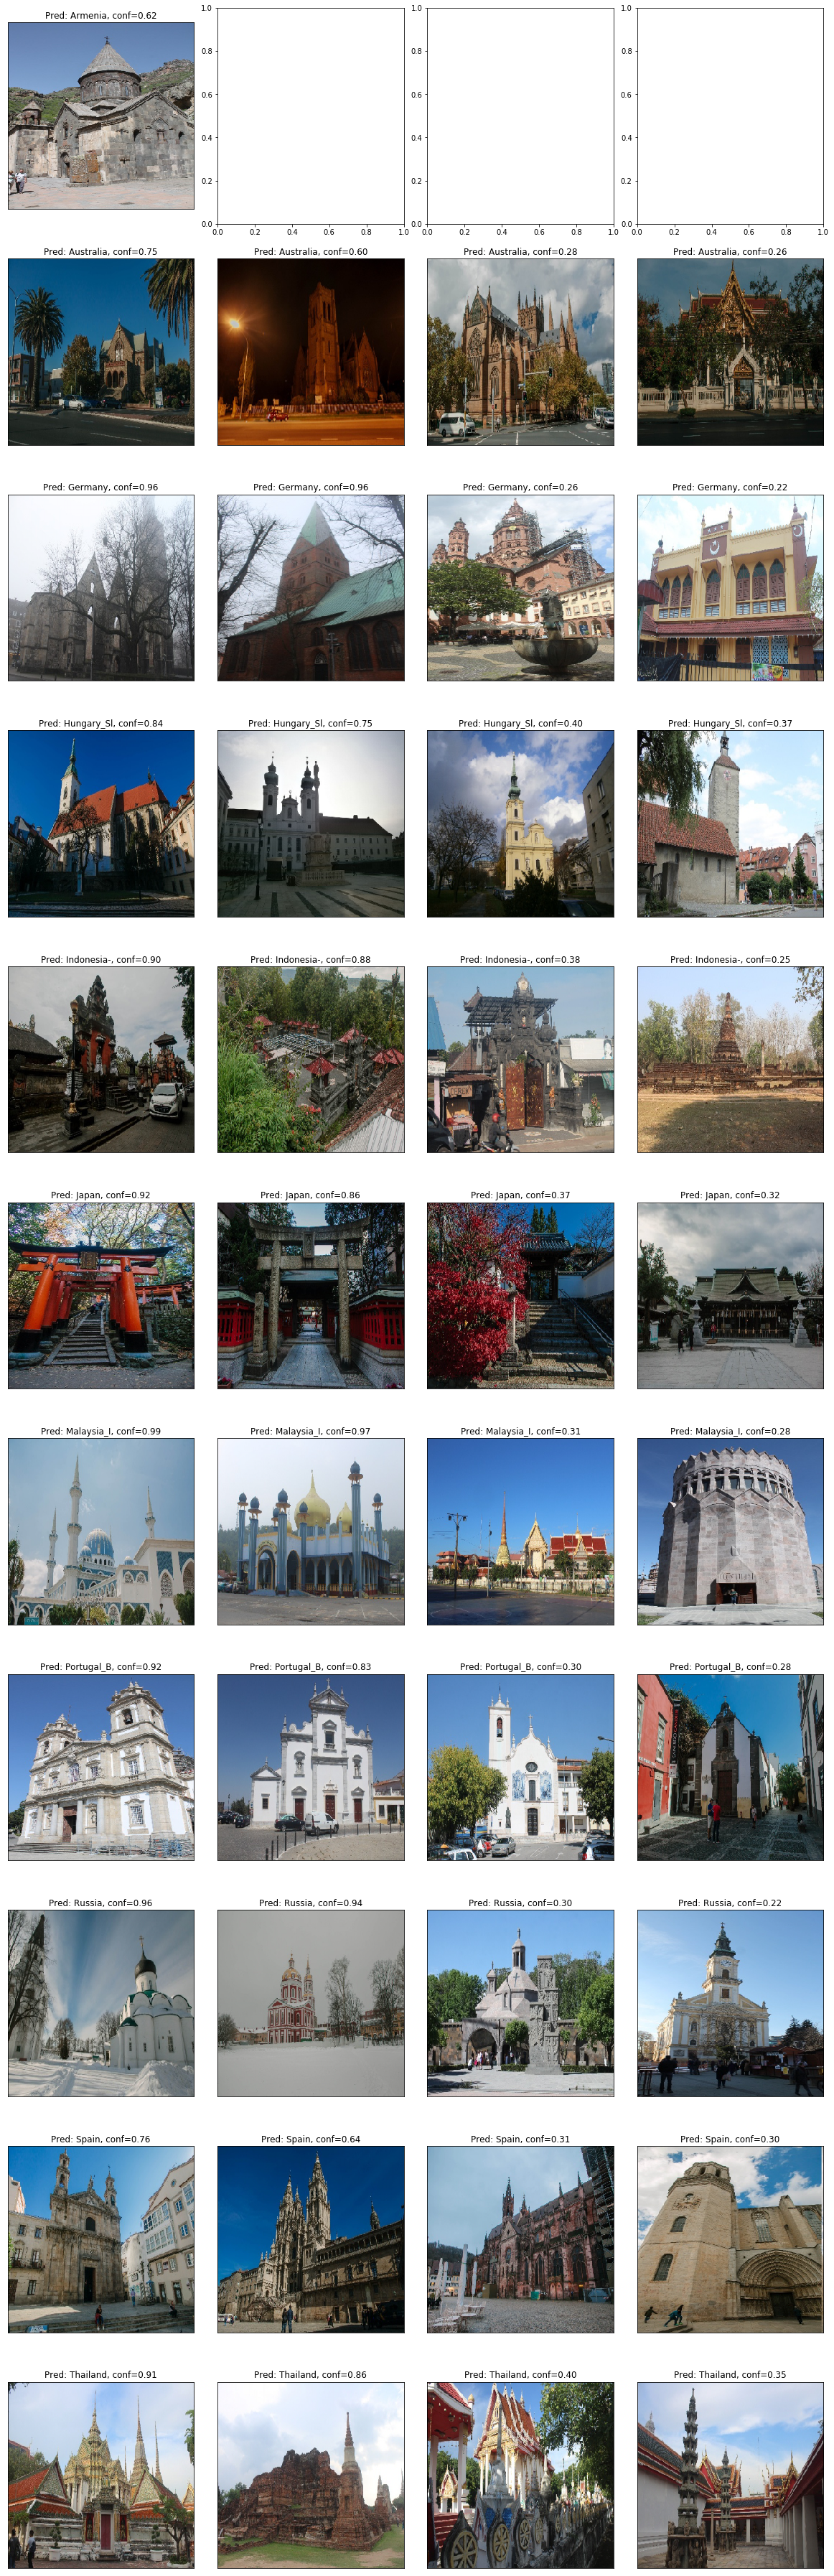

In [8]:
fig, axs = plt.subplots(11, 4, figsize=(16, 50))
for c_idx, country in enumerate(sorted(country_results.keys())):
                        
    conf_fn_pairs = sorted(country_results[country], reverse=True)
                        
    if len(conf_fn_pairs) > 5:
        top_results = conf_fn_pairs[:2]
        bot_results = conf_fn_pairs[-2:]
        conf_fn_pairs = top_results + bot_results
            
    for i,pair in enumerate(conf_fn_pairs):
        conf, filename = pair
        img = ImageUtilities.load_image(os.path.join(directory_to_process, filename))
        img, _ = rcorrect.fix_one_image(img, quiet=True)
        axs[c_idx][i].imshow(img)
        axs[c_idx][i].set_title(f'Pred: {country[:10].replace("+","_")}, conf={conf:.2f}')
        axs[c_idx][i].get_xaxis().set_visible(False)
        axs[c_idx][i].get_yaxis().set_visible(False)
        
fig.tight_layout(pad=0.2)
print('First two columns are most confident predictions, last two columns are least confident.')

In [34]:
csvA = pd.read_csv('classify_results_e2e_tests_test_fold_0_rand_click.csv', header=None).values.tolist()
csvB = pd.read_csv('classify_results_e2e_tests_test_fold_0_rand_click.csv', header=None).values.tolist()
a = [row[1] for row sorted(csvA)]
print(sklearn.metrics.classification_report(a,b))

[['A_Coruna_022_SPAIN.jpg', 'Spain'], ['Aachen_003_GERMA.JPG', 'Germany'], ['Adelaide_104_AUSTR.jpg', 'Australia'], ['Alexandrov_015_RUSSI.jpg', 'Russia'], ['Alexandrov_026_RUSSI.jpg', 'Russia'], ['Alor_Setar_062_MALAY.JPG', 'Malaysia+Indonesia'], ['Alor_Setar_078_MALAY.JPG', 'Germany'], ['Arzamas_047_RUSSI.jpg', 'Russia'], ['Aveiro_009_PORTU.JPG', 'Portugal+Brazil'], ['Ayutthaya_030_THAIL.JPG', 'Thailand'], ['Bali_110_INDON.JPG', 'Indonesia-Bali'], ['Bali_2019_042_INDON.jpg', 'Indonesia-Bali'], ['Bali_2019_076_INDON.jpg', 'Indonesia-Bali'], ['Bali_2019_112_INDON.jpg', 'Indonesia-Bali'], ['Bali_2019_374_INDON.jpg', 'Indonesia-Bali'], ['Bali_2019_376_INDON.jpg', 'Indonesia-Bali'], ['Bali_2019_511_INDON.jpg', 'Indonesia-Bali'], ['Bali_2019_516_INDON.jpg', 'Indonesia-Bali'], ['Bali_527_INDON.JPG', 'Indonesia-Bali'], ['Banda_Aceh_093_MALAY.jpg', 'Malaysia+Indonesia'], ['Bangkok_2019_110_THAIL.jpg', 'Thailand'], ['Bangkok_2019_212_THAIL.jpg', 'Thailand'], ['Bangkok_2019_222_THAIL.jpg', 'Aus